# WeatherPy

### Analysis
-  The Temperature vs Latitude graph shows a clear trend of increased temperature as latitute approaches zero, although the peak seems to be closer to 20 degrees than on the actual equator. This could be due to the axis tilt of the earth currently bringing summer temperatures to the 20th north parallel.

-  The Humidity vs Latitude graph shows that no cities outside the +-40 degree latitude range have much humidity, but the values within that range vary considerably.

-  The other plots do not show much in terms of trends towards the equator, with a pretty even distribution of values for the entire range of latitudes.


In [75]:
#import dependencies
import arrow
import json
import requests
from keys import weather_api
from citipy import citipy
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy.core as owm

In [24]:
#build base URL
base_url = 'http://api.openweathermap.org/data/2.5/weather?'


# Generate Cities List/Perform API Calls

In [71]:
#set lat, long ranges.  Declare lists for weather variables. Included in loop cell to make blank lists every time it's run.
lat_params = np.arange(-90, 90, 10)
long_params = np.random.uniform(-180, 180, 130)
cities = []
temperatures = []
lat_list = []
wind_list = []
humidity_list = []
cloud_list = []
city_id_list = []
date_list = []
country_list = []
long_list = []
#loop through lat, long, find nearest city, make api calls for json data
for long in long_params:
    for lat in lat_params:
        city = citipy.nearest_city(lat, long).city_name
        url = base_url + "appid=" + weather_api + "&q=" + city +"&units=imperial"
        response = requests.get(url)
        data = response.json()
        #check for duplicate cities and add city weather info to lists. try is for nonexistant city data.
        try:
            if city in cities:
                continue
            temp = data["main"]["temp_max"]
            humidity = data["main"]["humidity"]
            wind = data["wind"]["speed"]
            cloudy = data["clouds"]["all"]
            lat_list.append(data["coord"]["lat"])
            long_list.append(data["coord"]["lon"])
            date = data["dt"]
            country = data["sys"]["country"]
            country_list.append(country)
            date_list.append(date)
            temperatures.append(temp)
            humidity_list.append(humidity)
            wind_list.append(wind)
            cloud_list.append(cloudy)
            cities.append(city)
            city_id = data["id"]
            city_id_list.append(city)
        except(KeyError):
            continue
        print(f"looking up data on {city} at {url}")
        print(f"city id is {city_id}")

looking up data on albany at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=albany&units=imperial
city id is 5106834
looking up data on busselton at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=busselton&units=imperial
city id is 2075265
looking up data on geraldton at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=geraldton&units=imperial
city id is 5960603
looking up data on carnarvon at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=carnarvon&units=imperial
city id is 1014034
looking up data on labuhan at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=labuhan&units=imperial
city id is 1641899
looking up data on kampot at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=kampot&units=imperial
city id is 1831112
looking up data on xam nua at ht

looking up data on kavaratti at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=kavaratti&units=imperial
city id is 1267390
looking up data on sur at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=sur&units=imperial
city id is 286245
looking up data on seydi at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=seydi&units=imperial
city id is 2448024
looking up data on gari at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=gari&units=imperial
city id is 1506676
looking up data on ushuaia at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=ushuaia&units=imperial
city id is 3833367
looking up data on cape town at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=cape town&units=imperial
city id is 3369157
looking up data on jamestown at http://api.openweat

looking up data on jermuk at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=jermuk&units=imperial
city id is 174884
looking up data on kamyshin at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=kamyshin&units=imperial
city id is 553287
looking up data on kichmengskiy gorodok at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=kichmengskiy gorodok&units=imperial
city id is 548791
looking up data on mezen at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=mezen&units=imperial
city id is 527321
looking up data on betafo at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=betafo&units=imperial
city id is 1066514
looking up data on mogadishu at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=mogadishu&units=imperial
city id is 53654
looking up data on xoc

looking up data on katsuura at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=katsuura&units=imperial
city id is 1865309
looking up data on kushiro at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=kushiro&units=imperial
city id is 2129072
looking up data on poronaysk at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=poronaysk&units=imperial
city id is 2121909
looking up data on okhotsk at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=okhotsk&units=imperial
city id is 2122605
looking up data on belaya gora at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=belaya gora&units=imperial
city id is 2126785
looking up data on chokurdakh at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=chokurdakh&units=imperial
city id is 2126123
looking up data on a

looking up data on sechelt at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=sechelt&units=imperial
city id is 6143367
looking up data on fort nelson at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=fort nelson&units=imperial
city id is 5955902
looking up data on norman wells at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=norman wells&units=imperial
city id is 6089245
looking up data on sechura at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=sechura&units=imperial
city id is 3691954
looking up data on san rafael del sur at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=san rafael del sur&units=imperial
city id is 3616594
looking up data on felipe carrillo puerto at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=felipe carrillo puerto&unit

looking up data on ossora at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=ossora&units=imperial
city id is 2122389
looking up data on cherskiy at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=cherskiy&units=imperial
city id is 2126199
looking up data on half moon bay at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=half moon bay&units=imperial
city id is 5354943
looking up data on ketchikan at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=ketchikan&units=imperial
city id is 5554428
looking up data on whitehorse at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=whitehorse&units=imperial
city id is 6180550
looking up data on bambous virieux at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=bambous virieux&units=imperial
city id is 1106677
lo

looking up data on coffs harbour at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=coffs harbour&units=imperial
city id is 2171085
looking up data on yeppoon at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=yeppoon&units=imperial
city id is 2142316
looking up data on gizo at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=gizo&units=imperial
city id is 6693679
looking up data on namatanai at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=namatanai&units=imperial
city id is 2090021
looking up data on kavieng at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=kavieng&units=imperial
city id is 2094342
looking up data on hasaki at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=hasaki&units=imperial
city id is 2112802
looking up data on talaya at htt

looking up data on gorontalo at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=gorontalo&units=imperial
city id is 1643837
looking up data on caliling at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=caliling&units=imperial
city id is 1709625
looking up data on basco at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=basco&units=imperial
city id is 4863349
looking up data on shenjiamen at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=shenjiamen&units=imperial
city id is 1795632
looking up data on xiongyue at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=xiongyue&units=imperial
city id is 2033630
looking up data on genhe at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=genhe&units=imperial
city id is 2037252
looking up data on nizhniy kuranak

looking up data on rio gallegos at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=rio gallegos&units=imperial
city id is 3838859
looking up data on neuquen at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=neuquen&units=imperial
city id is 3843123
looking up data on san juan at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=san juan&units=imperial
city id is 1692193
looking up data on uyuni at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=uyuni&units=imperial
city id is 3901903
looking up data on senador guiomard at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=senador guiomard&units=imperial
city id is 3924752
looking up data on sao gabriel da cachoeira at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=sao gabriel da cachoeira&units=imperial

looking up data on laguna at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=laguna&units=imperial
city id is 4013704
looking up data on lagoa da prata at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=lagoa da prata&units=imperial
city id is 3459251
looking up data on gilbues at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=gilbues&units=imperial
city id is 3398931
looking up data on carutapera at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=carutapera&units=imperial
city id is 3402648
looking up data on cayenne at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=cayenne&units=imperial
city id is 3382160
looking up data on bathsheba at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=bathsheba&units=imperial
city id is 3374083
looking up data on

looking up data on knysna at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=knysna&units=imperial
city id is 988698
looking up data on prieska at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=prieska&units=imperial
city id is 964090
looking up data on sehithwa at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=sehithwa&units=imperial
city id is 933109
looking up data on basoko at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=basoko&units=imperial
city id is 219414
looking up data on jalu at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=jalu&units=imperial
city id is 86049
looking up data on jaroslaw at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=jaroslaw&units=imperial
city id is 770380
looking up data on hanko at http://api.openweathermap

looking up data on omsukchan at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=omsukchan&units=imperial
city id is 2122493
looking up data on hervey bay at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=hervey bay&units=imperial
city id is 2146219
looking up data on corinto at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=corinto&units=imperial
city id is 3465512
looking up data on tzucacab at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=tzucacab&units=imperial
city id is 3514961
looking up data on gulfport at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=gulfport&units=imperial
city id is 4428667
looking up data on decatur at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=decatur&units=imperial
city id is 4617650
looking up data on thunder

looking up data on hanover at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=hanover&units=imperial
city id is 3221033
looking up data on alegrete at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=alegrete&units=imperial
city id is 3472638
looking up data on san carlos de bariloche at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=san carlos de bariloche&units=imperial
city id is 7647007
looking up data on manoel urbano at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=manoel urbano&units=imperial
city id is 3663495
looking up data on mitu at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=mitu&units=imperial
city id is 117392
looking up data on carora at http://api.openweathermap.org/data/2.5/weather?appid=709fc5eb59d682abe372ff731b68f9dc&q=carora&units=imperial
city id is 3646487
loo

In [72]:
#build dataframe from pulled weather data, check for missing data
weather_dict = {"City Name" : cities, "Max Temperature (F)" : temperatures, "Humidity (%)" : humidity_list, "Wind Speed (mph)" :
               wind_list, "Latitude" : lat_list, "Longitude" : long_list, "Cloudiness (%)" : cloud_list, "Date" : date_list,
               "Country" : country_list}
weather_df = pd.DataFrame(weather_dict)
weather_df.count()



City Name              659
Cloudiness (%)         659
Country                659
Date                   659
Humidity (%)           659
Latitude               659
Longitude              659
Max Temperature (F)    659
Wind Speed (mph)       659
dtype: int64

In [77]:
#display dataframe, export to City_Data
weather_df.to_csv("City_Data", encoding='utf-8', index=False)
weather_df.head()

,City Name,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temperature (F),Wind Speed (mph)
0,albany,90,US,1527803940,69,42.65,-73.75,73.40,11.41
1,busselton,80,AU,1527807041,100,-33.64,115.35,55.22,3.60
2,geraldton,90,CA,1527804000,93,49.72,-86.95,42.80,13.87
3,carnarvon,0,ZA,1527806915,73,-30.97,22.13,35.60,14.67
4,labuhan,80,ID,1527807042,94,-2.54,115.51,74.03,1.48


# Latitude vs. Temperature Plot

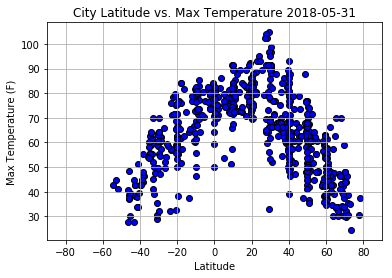

In [74]:
# set x and y vars, use arrow module to pull current date, make scatter plot and add labels.
x_vars = weather_df["Latitude"]
y_vars = weather_df["Max Temperature (F)"]
date = arrow.now().format('YYYY-MM-DD')
plt.scatter(x_vars, y_vars, marker = 'o', facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.xlim(-90, 90)
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.show()

# Latitude vs. Humidity Plot

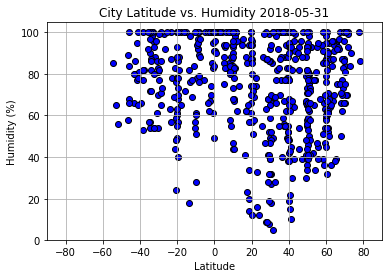

In [64]:
#set x and y vars, make scatter plot and add labels
x_vars = weather_df["Latitude"]
y_vars = weather_df["Humidity (%)"]
plt.scatter(x_vars, y_vars, marker = 'o', facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.xlim(-90, 90)
plt.ylabel("Humidity (%)")
plt.grid()
plt.title(f"City Latitude vs. Humidity {date}")
plt.show()

# Latitude vs. Cloudiness Plot

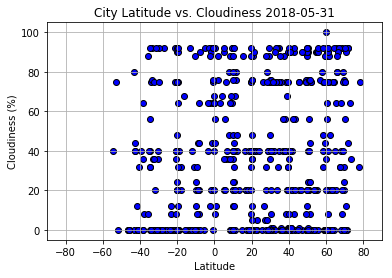

In [65]:
#set x and y variables, plot and add labels.
x_vars = weather_df["Latitude"]
y_vars = weather_df["Cloudiness (%)"]
plt.scatter(x_vars, y_vars, marker = 'o', facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.xlim(-90, 90)
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.show()

# Latitude vs. Wind Speed Plot

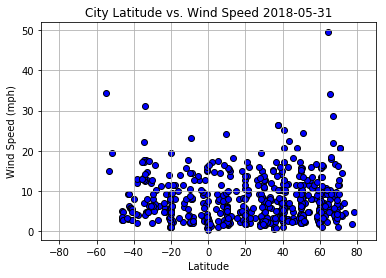

In [66]:
#same as previous few plots, just with wind speed as y variable
x_vars = weather_df["Latitude"]
y_vars = weather_df["Wind Speed (mph)"]
plt.scatter(x_vars, y_vars, marker = 'o', facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.xlim(-90, 90)
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.show()